# Coding project - Picture enhancement

Write code that automatically enhances a photograph.

<img src="./etretat.jpg" width="250px" />
<img src="./ex_enhance.jpg" width="250px" />

"Enhance" may mean a lot of different things, and we encourage you to be creative in which enhancements you want to implement.

Some possibilities include (not an exhaustive list):

* Noise reduction
* Auto-level
* Gamma correction (with gamma provided by the user or automatically determined from the image histogram)
* Increase colour saturation
* ...

<IPython.core.display.Javascript object>


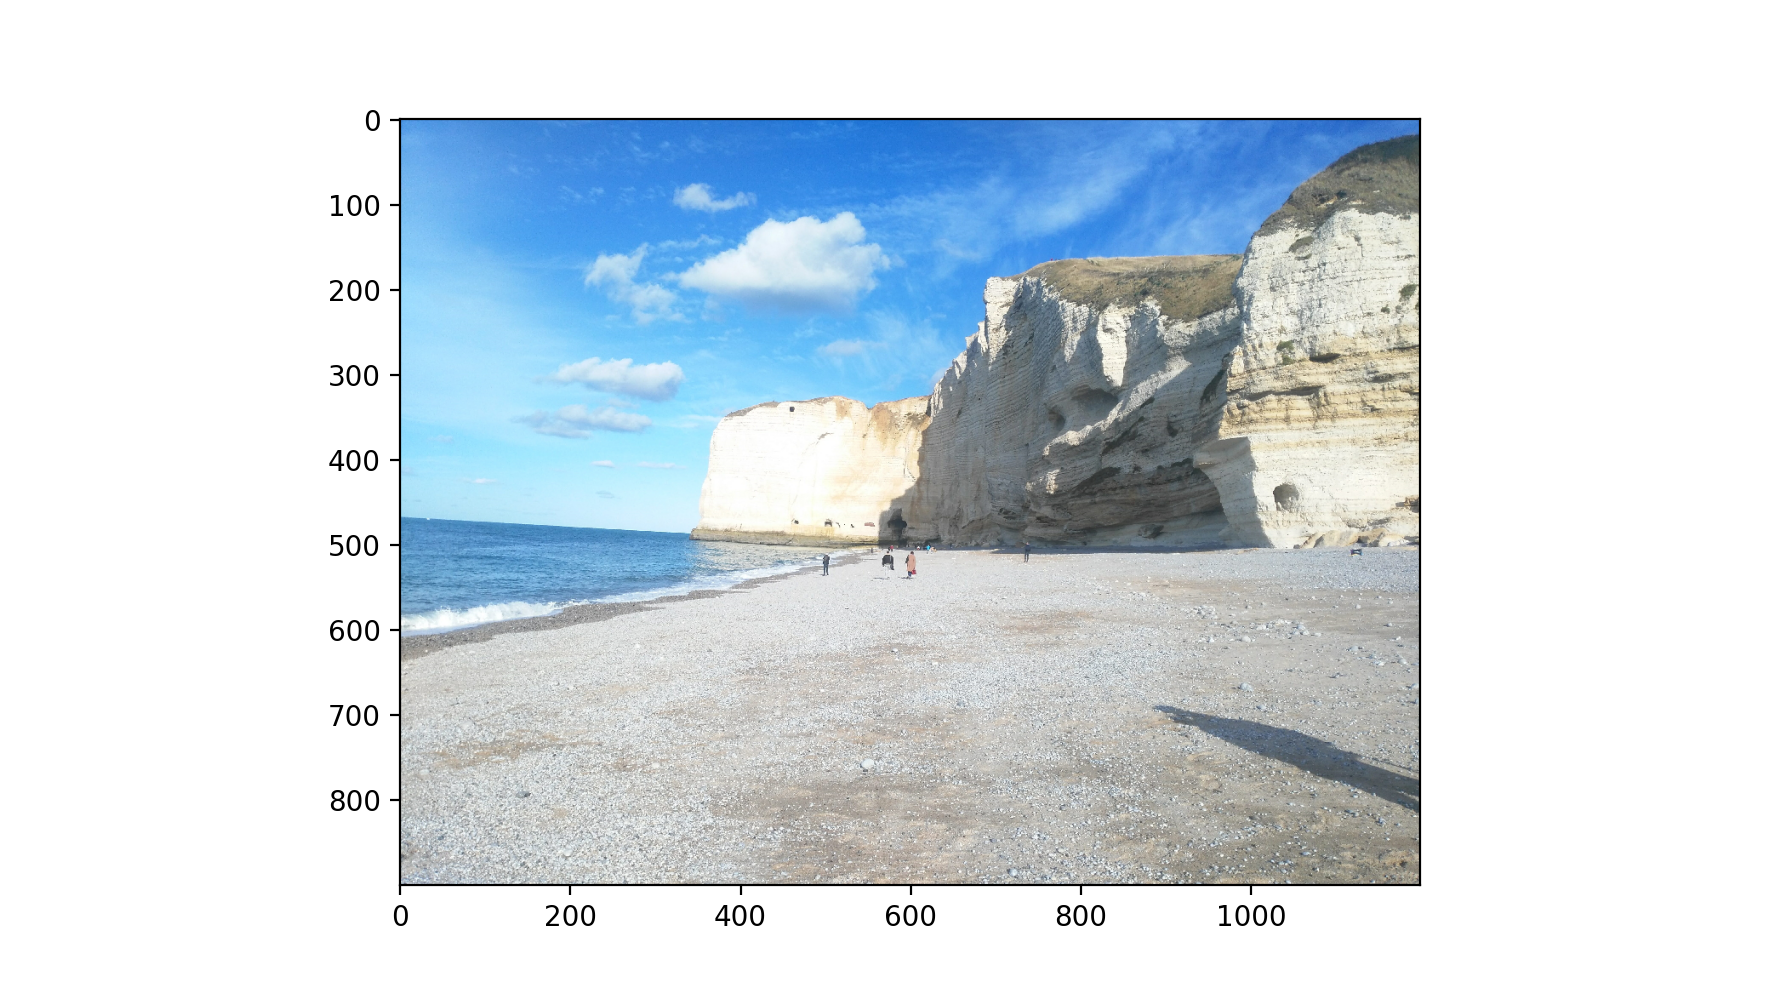

<function matplotlib.pyplot.show(*args, **kw)>

In [39]:
from skimage.io import imread,imshow,imsave
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib notebook


###############
#Definition of function used :

def cumul_hist(im):                     #calculates the cumulative histogram of an image
    cumul_hist = np.zeros((256,))   
    c = 0
    for v in range (256):
        c += (im==v).sum()
        cumul_hist[v] = c
    cumul_hist /= cumul_hist.max()
    return cumul_hist

###############

im = imread("etretat.jpg")

plt.figure()
plt.imshow(im)
plt.show


In oder to enhance this image, we will first focus on the containt of each color channel. For this purpose, the histogram of each channel is generated : 

<IPython.core.display.Javascript object>


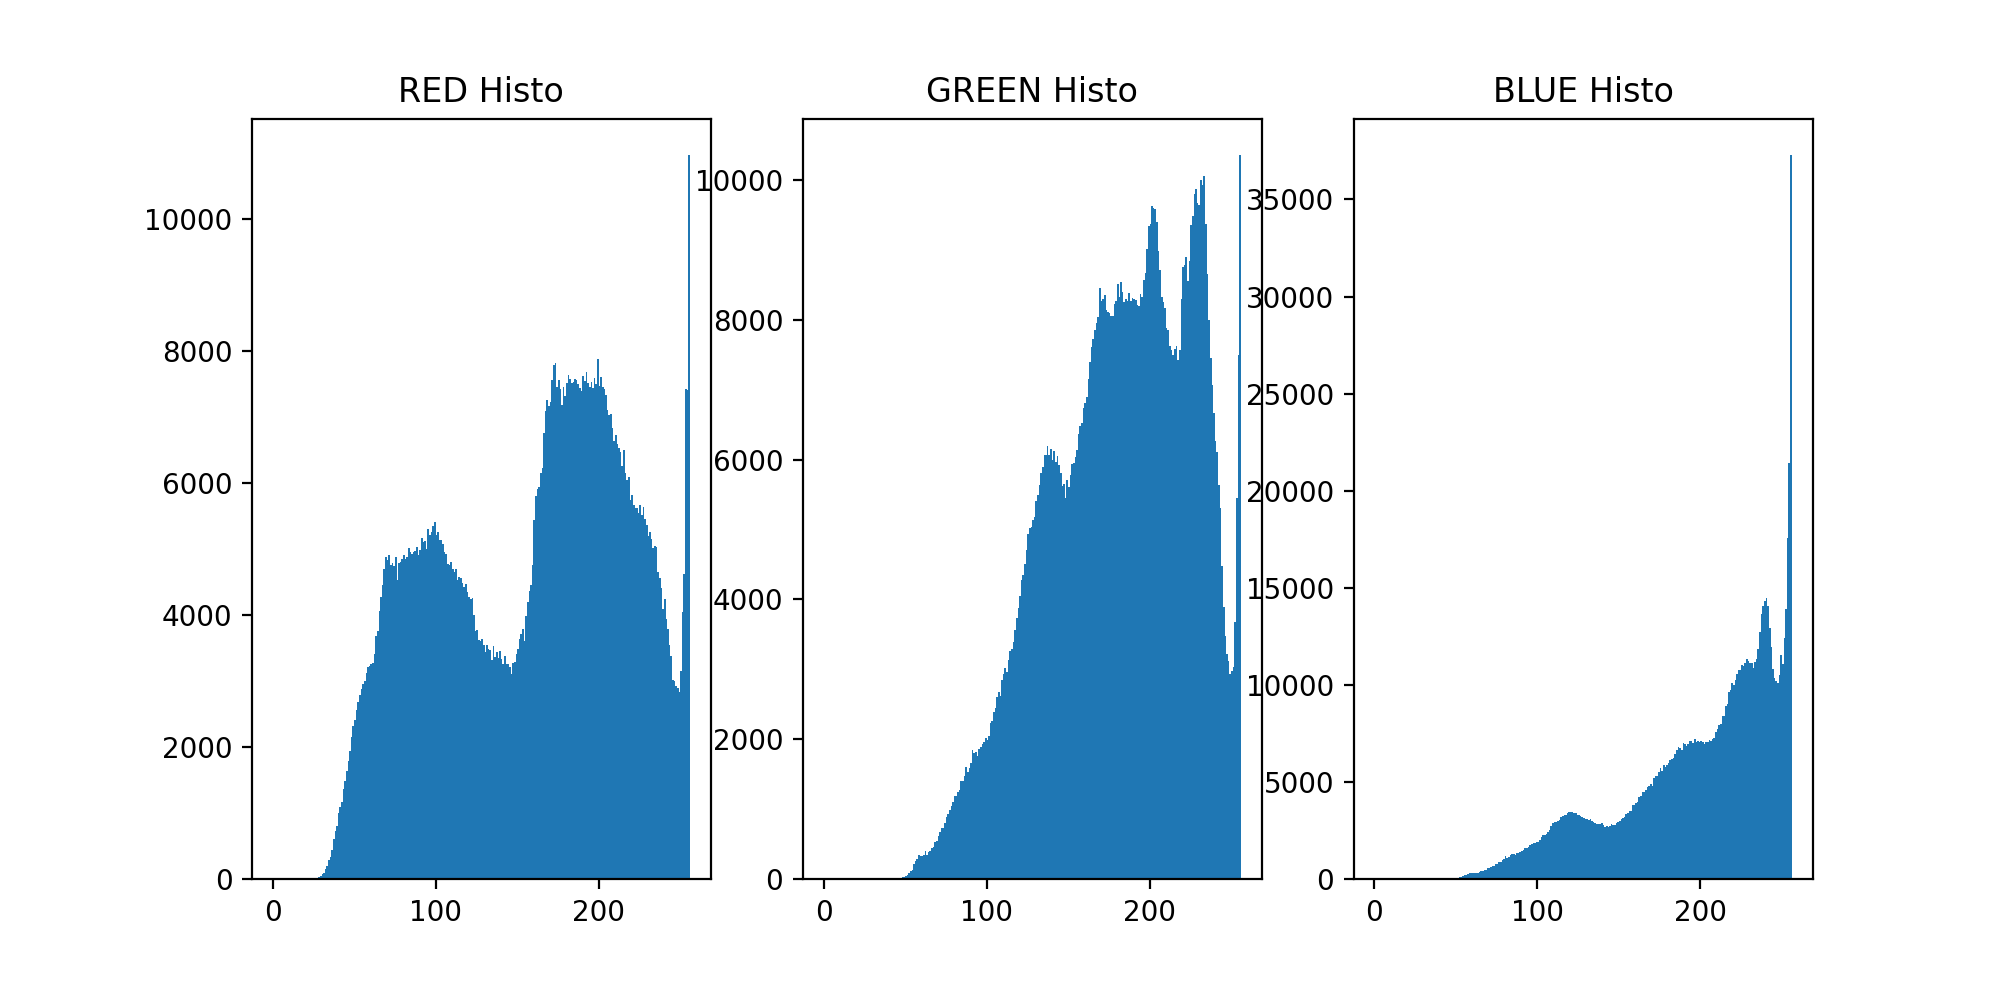

In [40]:
#Histrograms
plt.figure()
plt.subplot(1,3,1)
plt.title('RED Histo')                                 # RED channel histogram
plt.hist(im[:,:,0].flatten(),bins=np.arange(257))
plt.subplot(1,3,2)
plt.title('GREEN Histo')                               # GREEN channel histogram
plt.hist(im[:,:,1].flatten(),bins=np.arange(257))
plt.subplot(1,3,3)
plt.title('BLUE Histo')                                # Blue channel histogram
plt.hist(im[:,:,2].flatten(),bins=np.arange(257))
plt.show()

According to the histogram of the three channels, we can say that the image is overexposed (due to the presence of a lot of pixels with high value). We can also see that we are not using the entire dynamique range of levels available. 


 In oder to remain on this, an auto levels filter is used on each of the cahnnel :
 
 We have to define a minimum threshold value and a maximum threshold value. That will guarantee that 96% of the      information will bee kept and just 4% of it will be lost. To chose such values we are using the cummulative histogram 

<IPython.core.display.Javascript object>


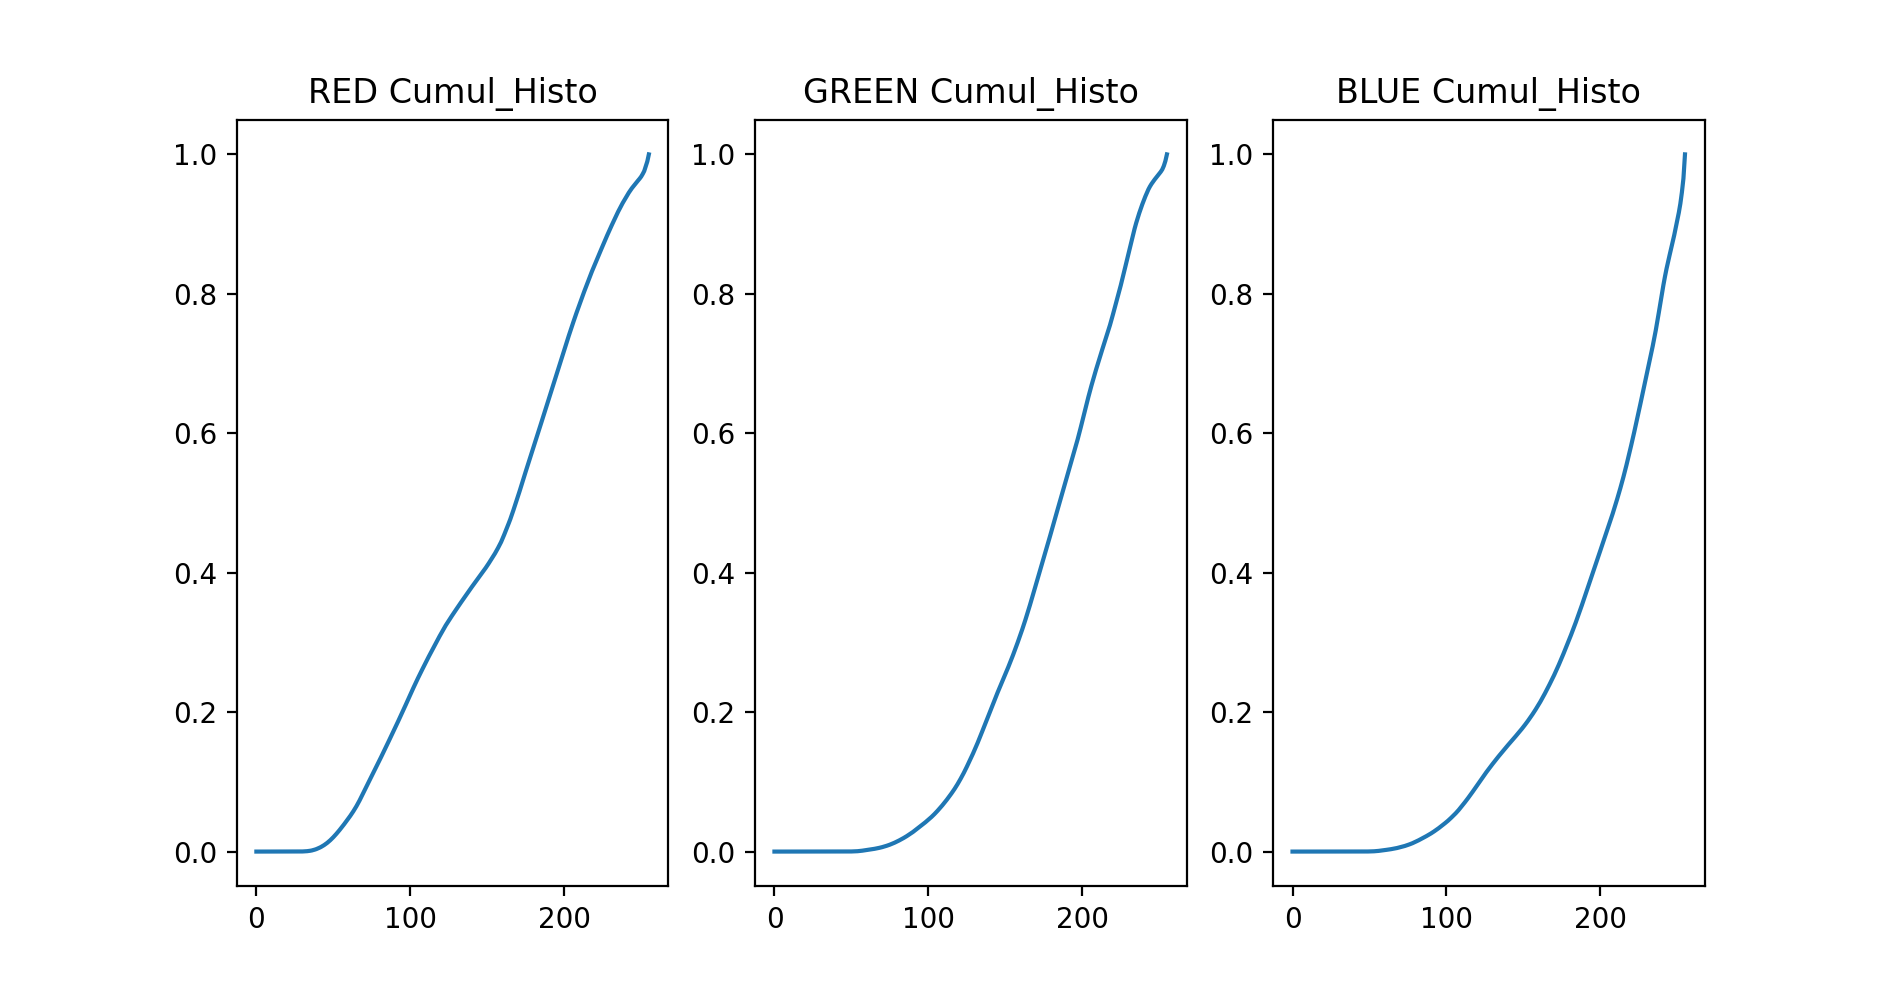

In [41]:
#Cumulative histrograms
hr = cumul_hist(im[:,:,0])
hg = cumul_hist(im[:,:,1])
hb = cumul_hist(im[:,:,2])

plt.figure()
plt.subplot(1,3,1)
plt.title('RED Cumul_Histo')             #RED channel cumulative histogram
plt.plot(hr)
plt.subplot(1,3,2)
plt.title('GREEN Cumul_Histo')           #GREEN channel cumulative histogram
plt.plot(hg)
plt.subplot(1,3,3)
plt.title('BLUE Cumul_Histo')            #BLUE channel cumulative histogram
plt.plot(hb)
plt.show()

In [42]:
#calculation of the thresholds values 
for v in range (256):
    if hr[v] > 0.02: break     
RTmin = v-1                   

for v in range (256):
    if hr[255-v] < 0.98: break  
RTmax = (255-v) +1

print("Threshold values : ",RTmin,RTmax," RED Channnel")                #Red channel threshold values

for v in range(256):                
    if hg[v] > 0.02: break     
GTmin = v-1                   

for v in range (256):       
    if hg[255-v] < 0.98: break  
GTmax = (255-v) +1

print("Threshold values : ",GTmin,GTmax," Green channel")                #Green channel threshold values

for v in range (256):
    if hb[v] > 0.02: break     
BTmin = v-1                   

for v in range (256):
    if hb[255-v] < 0.98: break  
BTmax = (255-v) +1

print("Threshold values : ",BTmin,BTmax," Blue channel")                 #Blue channel threshold values

Threshold values :  49 253  RED Channnel
Threshold values :  84 253  Green channel
Threshold values :  85 255  Blue channel


Once we have the threshold values, we will map all the values less greater or equal to Tmin to zero and all the values greater or equal to Tmax to 255. Values between Tmin and Tmax will be linear transfomred. For implementing this we are using the look up tables :

<IPython.core.display.Javascript object>


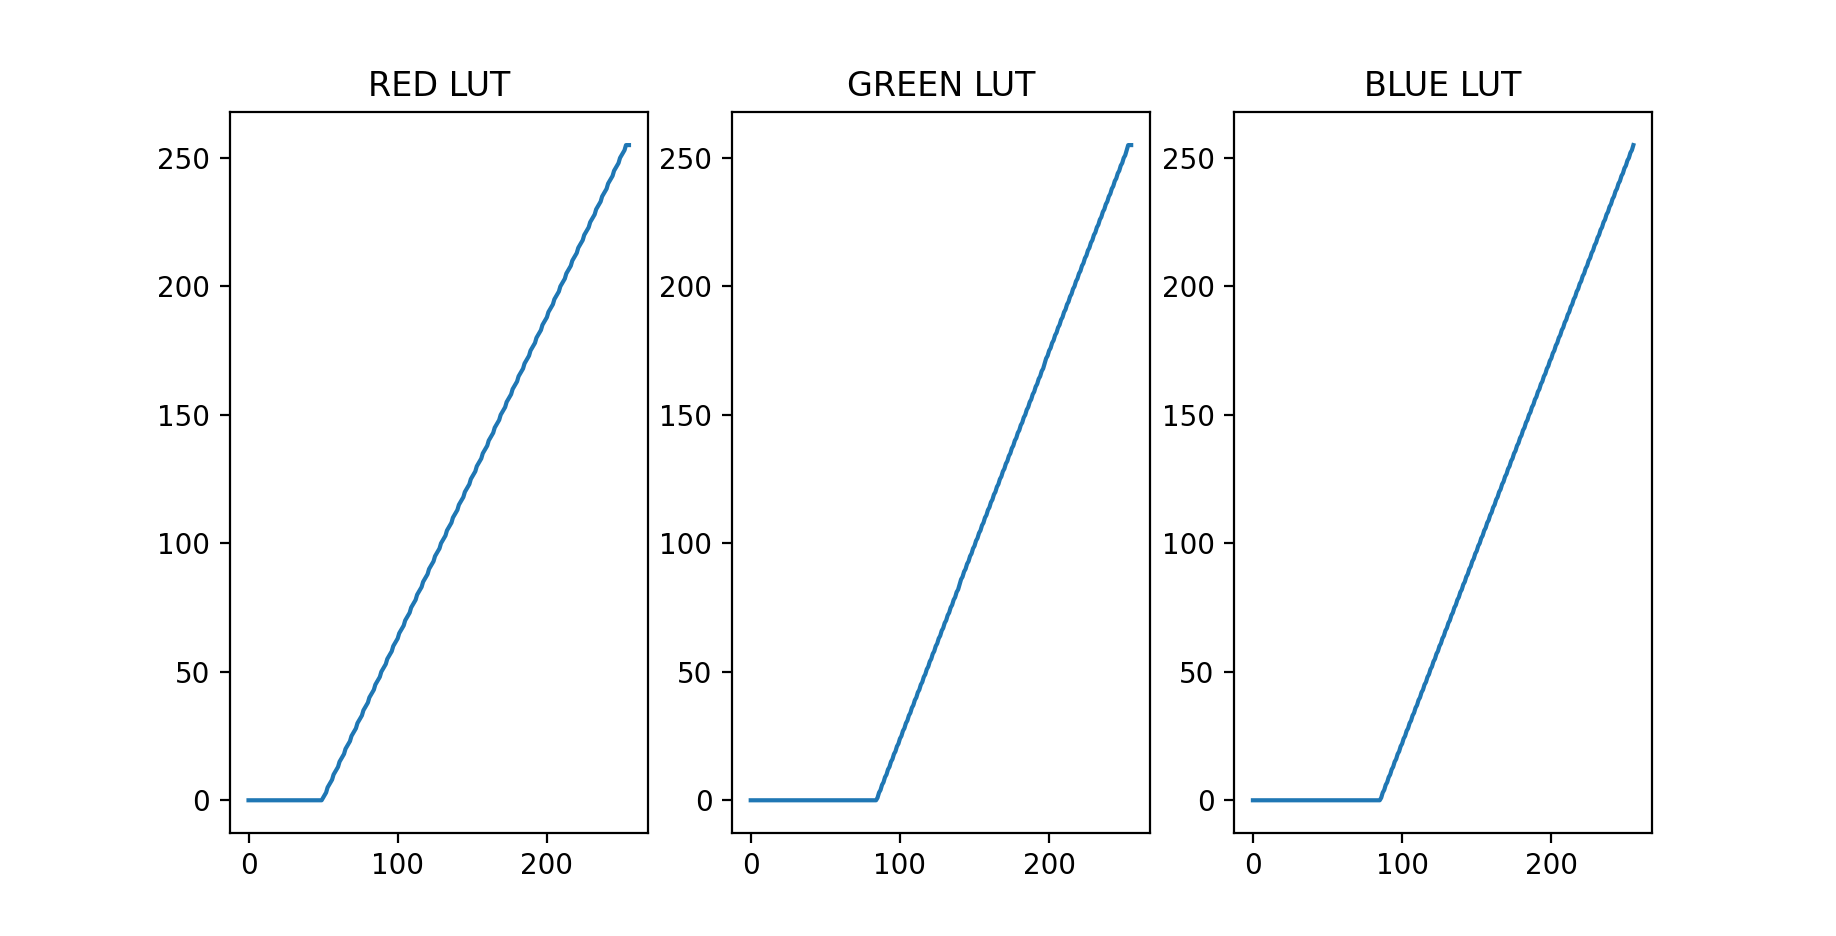

In [43]:
#Look up table for the red channel
lutR = np.arange(256)  
lutR[:RTmin] = 0
lutR[RTmax:] = 255
lutR[RTmin:RTmax] = (255/(RTmax-RTmin))*(lutR[RTmin:RTmax] -RTmin)

#Look up table for the Green channel
lutG = np.arange(256)
lutG[:GTmin] = 0
lutG[GTmax:] = 255
lutG[GTmin:GTmax] = (255/(GTmax-GTmin))*(lutG[GTmin:GTmax] -GTmin)

#Look up table for the Blue channel
lutB = np.arange(256)
lutB[:BTmin] = 0
lutB[BTmax:] = 255
lutB[BTmin:BTmax] = (255/(BTmax-BTmin))*(lutB[BTmin:BTmax] -BTmin)

plt.figure()
plt.subplot(1,3,1)
plt.title('RED LUT')
plt.plot(lutR)
plt.subplot(1,3,2)
plt.title('GREEN LUT')
plt.plot(lutG)
plt.subplot(1,3,3)
plt.title('BLUE LUT')
plt.plot(lutB)
plt.show()

Here above we can see the different mapping of each channel. Now we will apply this mappings to the image

<IPython.core.display.Javascript object>


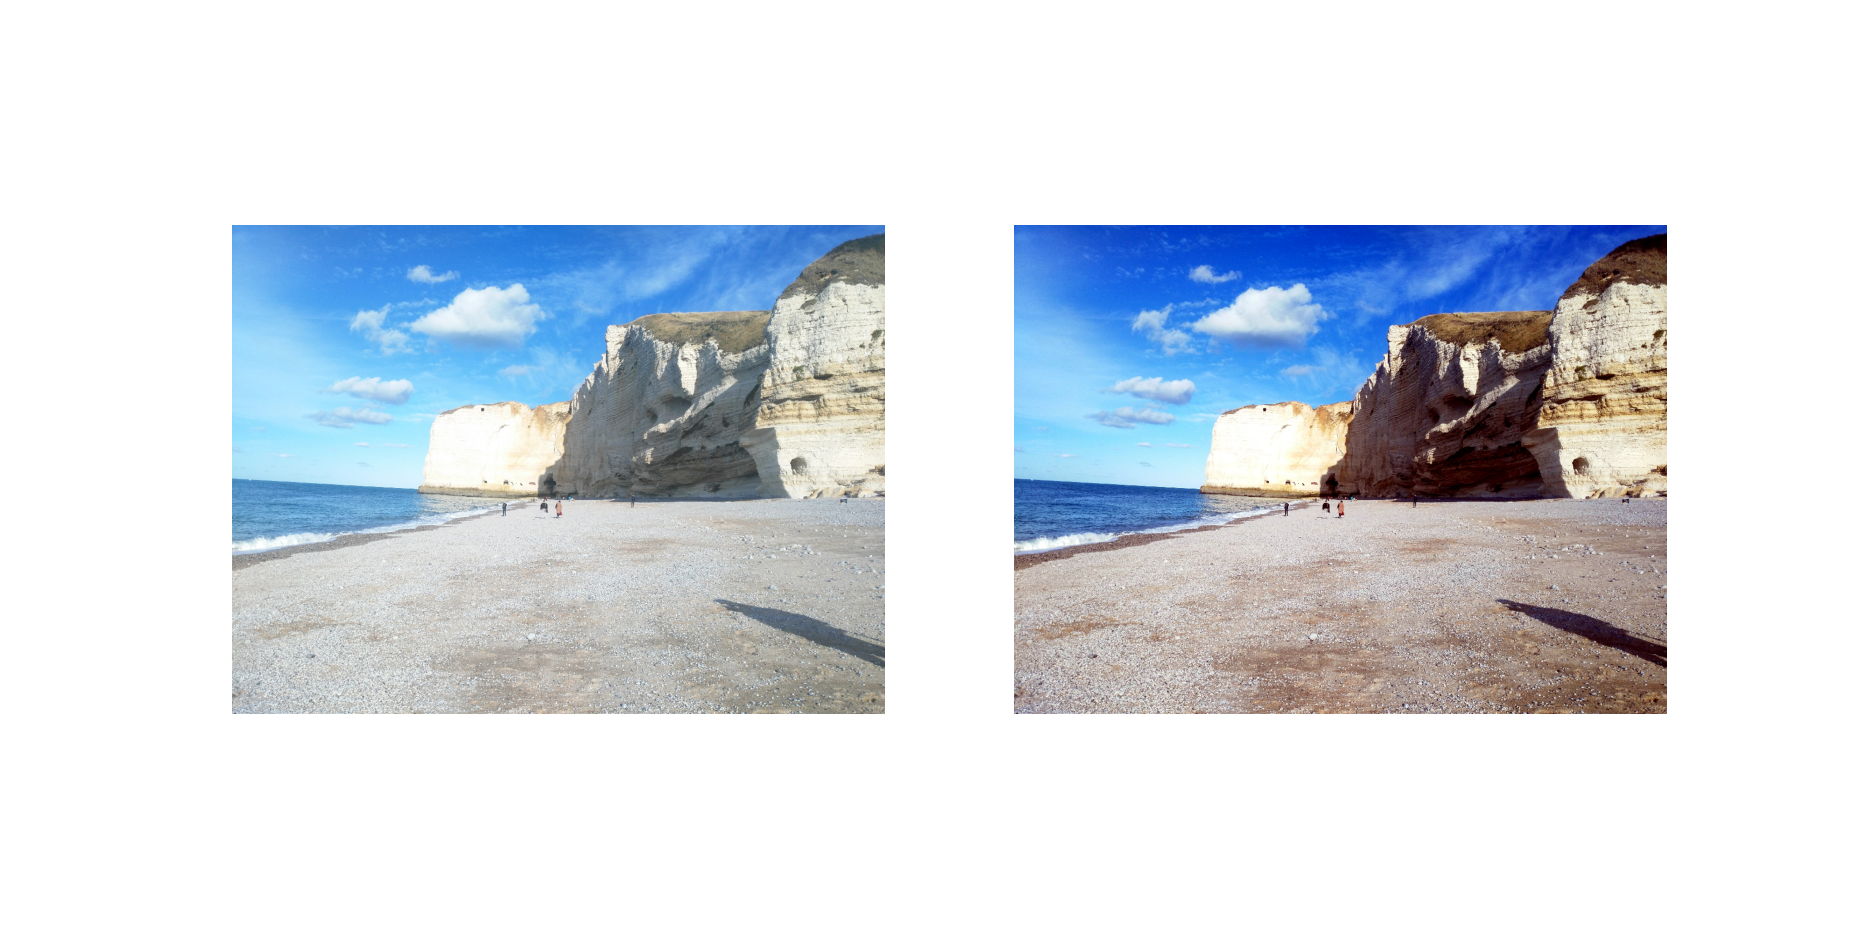

In [44]:
#crating an empty image of the same size than the original that will stock the mapped values
im_out1 = np.zeros((im.shape[0],im.shape[1],im.shape[2])).astype('uint8') 

#Applying the mapping
for j in range(im.shape[1]):
    for i in range(im.shape[0]):
        im_out1[i,j,0] = lutR[im[i,j,0]]
        im_out1[i,j,1] = lutG[im[i,j,1]]
        im_out1[i,j,2] = lutB[im[i,j,2]]

plt.figure()
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(im)
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(im_out)
plt.show()

For further enhancment we can proceed the histogram equalization. It will repartitionate the intensity of the image in a better way on the entire range of possible levels. 

First lets have a look to the initial histograms of the output image

<IPython.core.display.Javascript object>


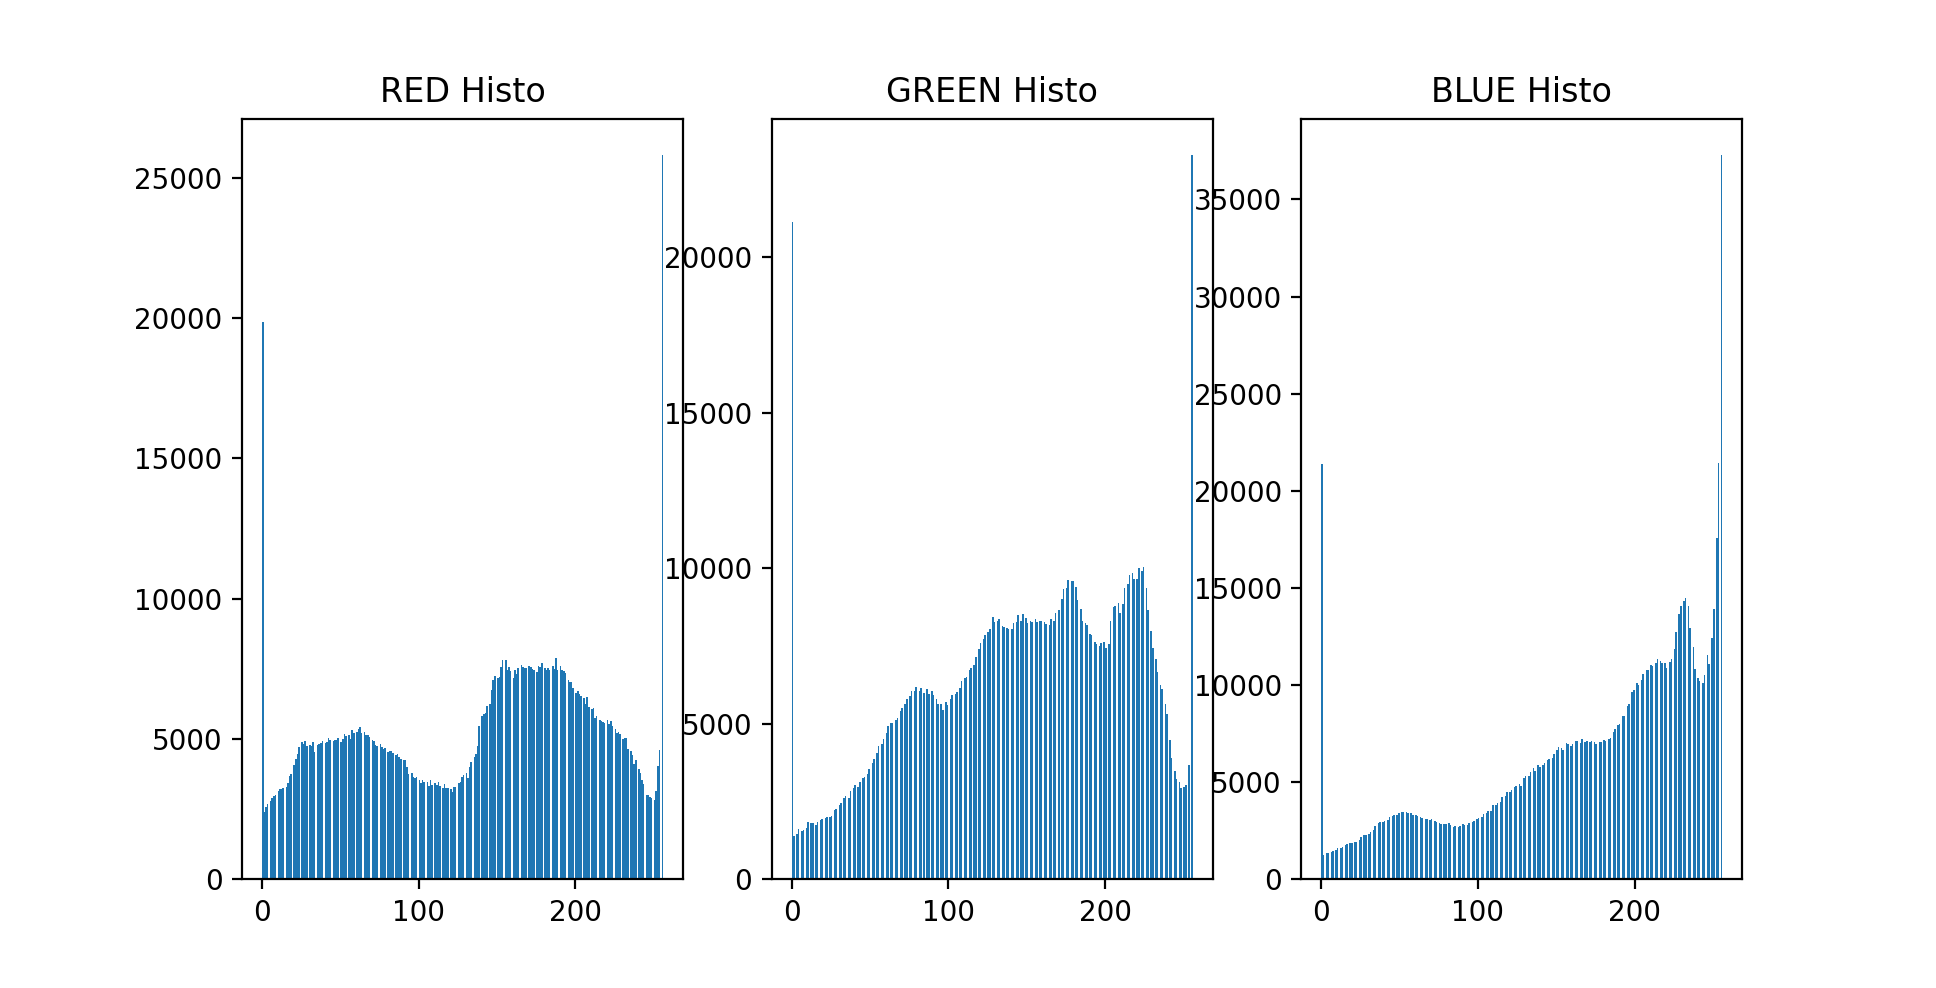

In [45]:
#histrograms
plt.figure()
plt.subplot(1,3,1)
plt.title('RED Histo')
plt.hist(im_out1[:,:,0].flatten(),bins=np.arange(257))
plt.subplot(1,3,2)
plt.title('GREEN Histo')
plt.hist(im_out1[:,:,1].flatten(),bins=np.arange(257))
plt.subplot(1,3,3)
plt.title('BLUE Histo')
plt.hist(im_out1[:,:,2].flatten(),bins=np.arange(257))
plt.show()

In order to obtain an adequat transformation that will equalize the histogram, we will use the cumulative histogram transformed in a look up table.

<IPython.core.display.Javascript object>


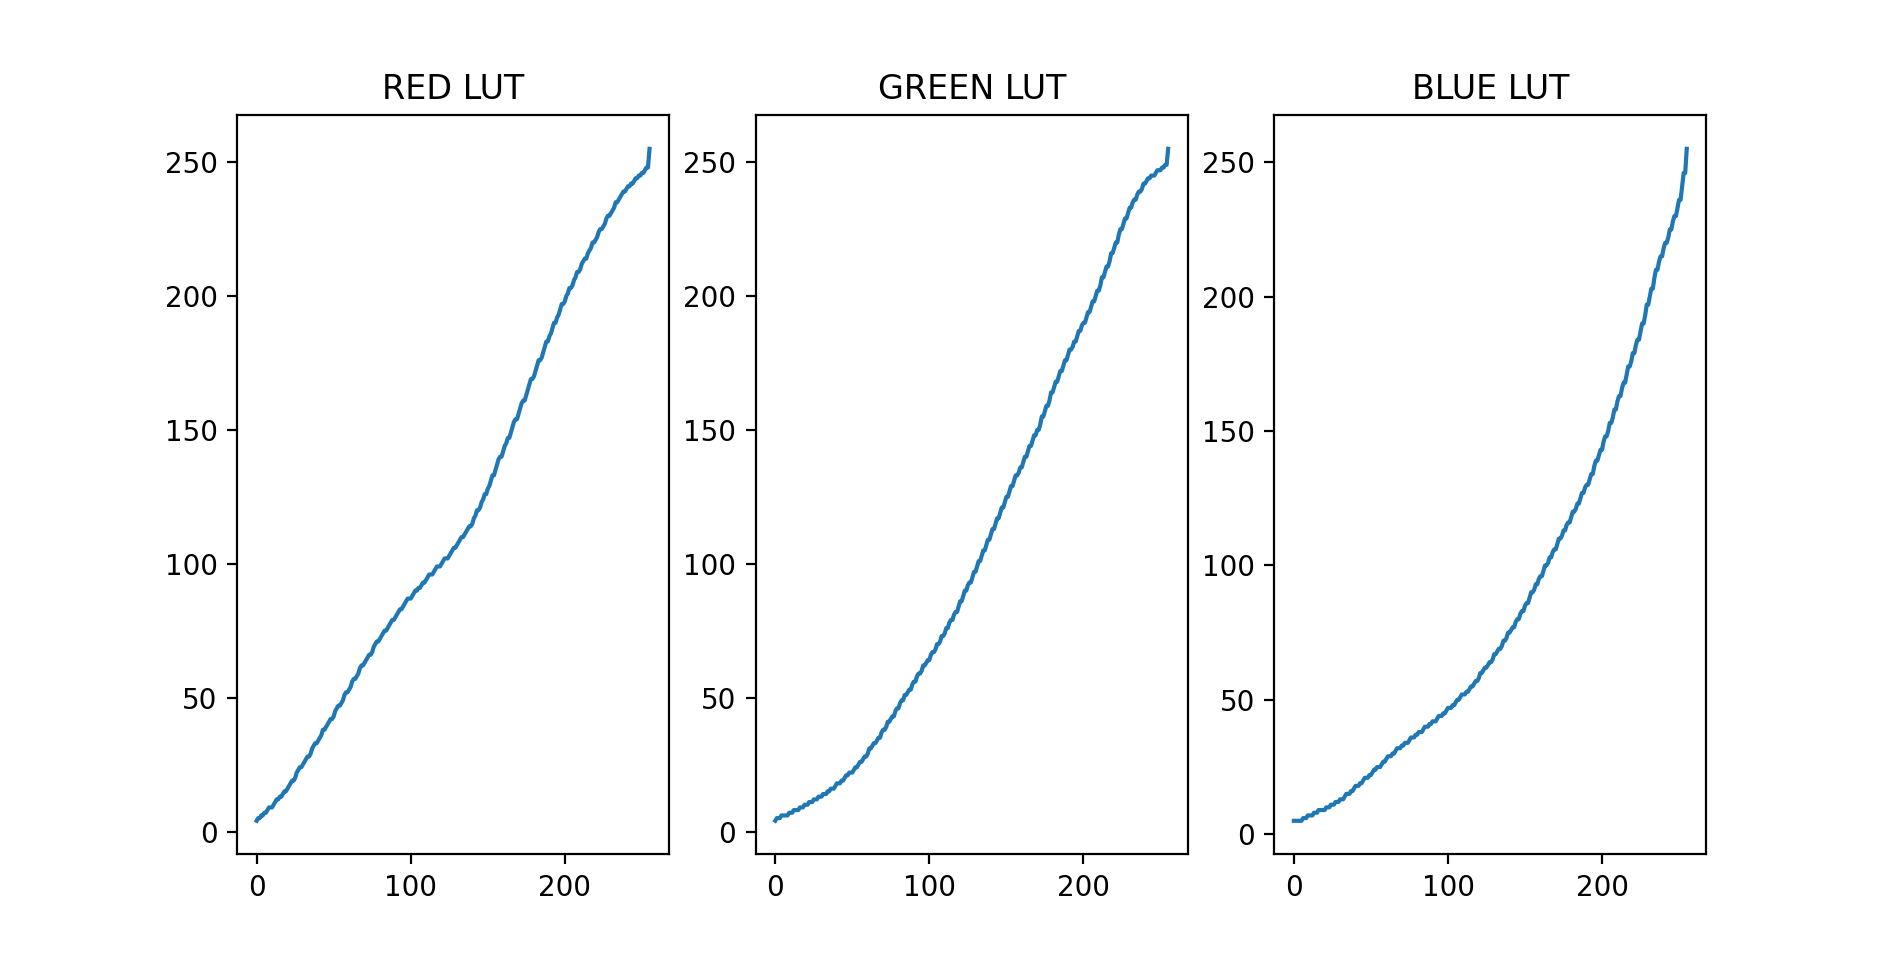

In [46]:
#Cumulative histograms
hr = cumul_hist(im_out1[:,:,0])
hg = cumul_hist(im_out1[:,:,1])
hb = cumul_hist(im_out1[:,:,2])

#transformation of the histograms in look up tables
lutr =(hr*255).astype('uint8')
lutg =(hg*255).astype('uint8')
lutb =(hb*255).astype('uint8')

plt.figure()
plt.subplot(1,3,1)
plt.title('RED LUT')
plt.plot(lutr)
plt.subplot(1,3,2)
plt.title('GREEN LUT')
plt.plot(lutg)
plt.subplot(1,3,3)
plt.title('BLUE LUT')
plt.plot(lutb)
plt.show()

<IPython.core.display.Javascript object>


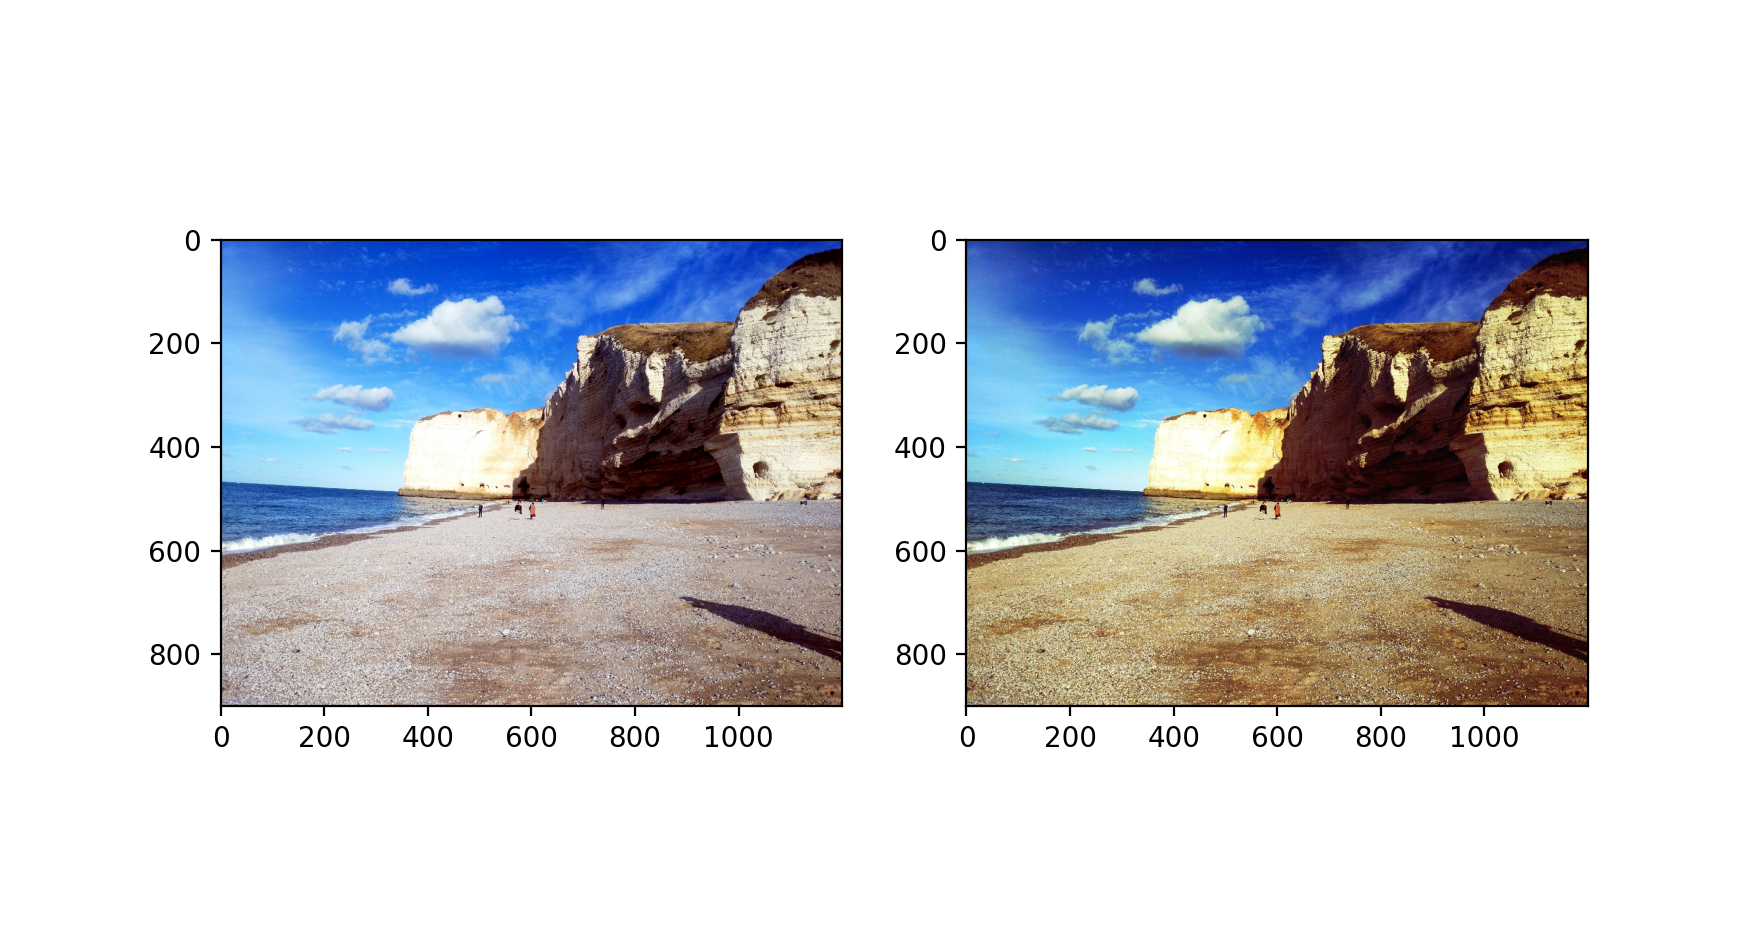

In [47]:
im_out2 = np.zeros((im.shape[0],im.shape[1],im.shape[2])).astype('uint8')
im_out2[:,:,0] = lutr[im_out1[:,:,0]]
im_out2[:,:,1] = lutg[im_out1[:,:,1]]
im_out2[:,:,2] = lutb[im_out1[:,:,2]]

plt.figure()
plt.subplot(1,2,1)
plt.imshow(im_out1)
plt.subplot(1,2,2)
plt.imshow(im_out2)
plt.show()

We can see the action of it on the histograms : 

<IPython.core.display.Javascript object>


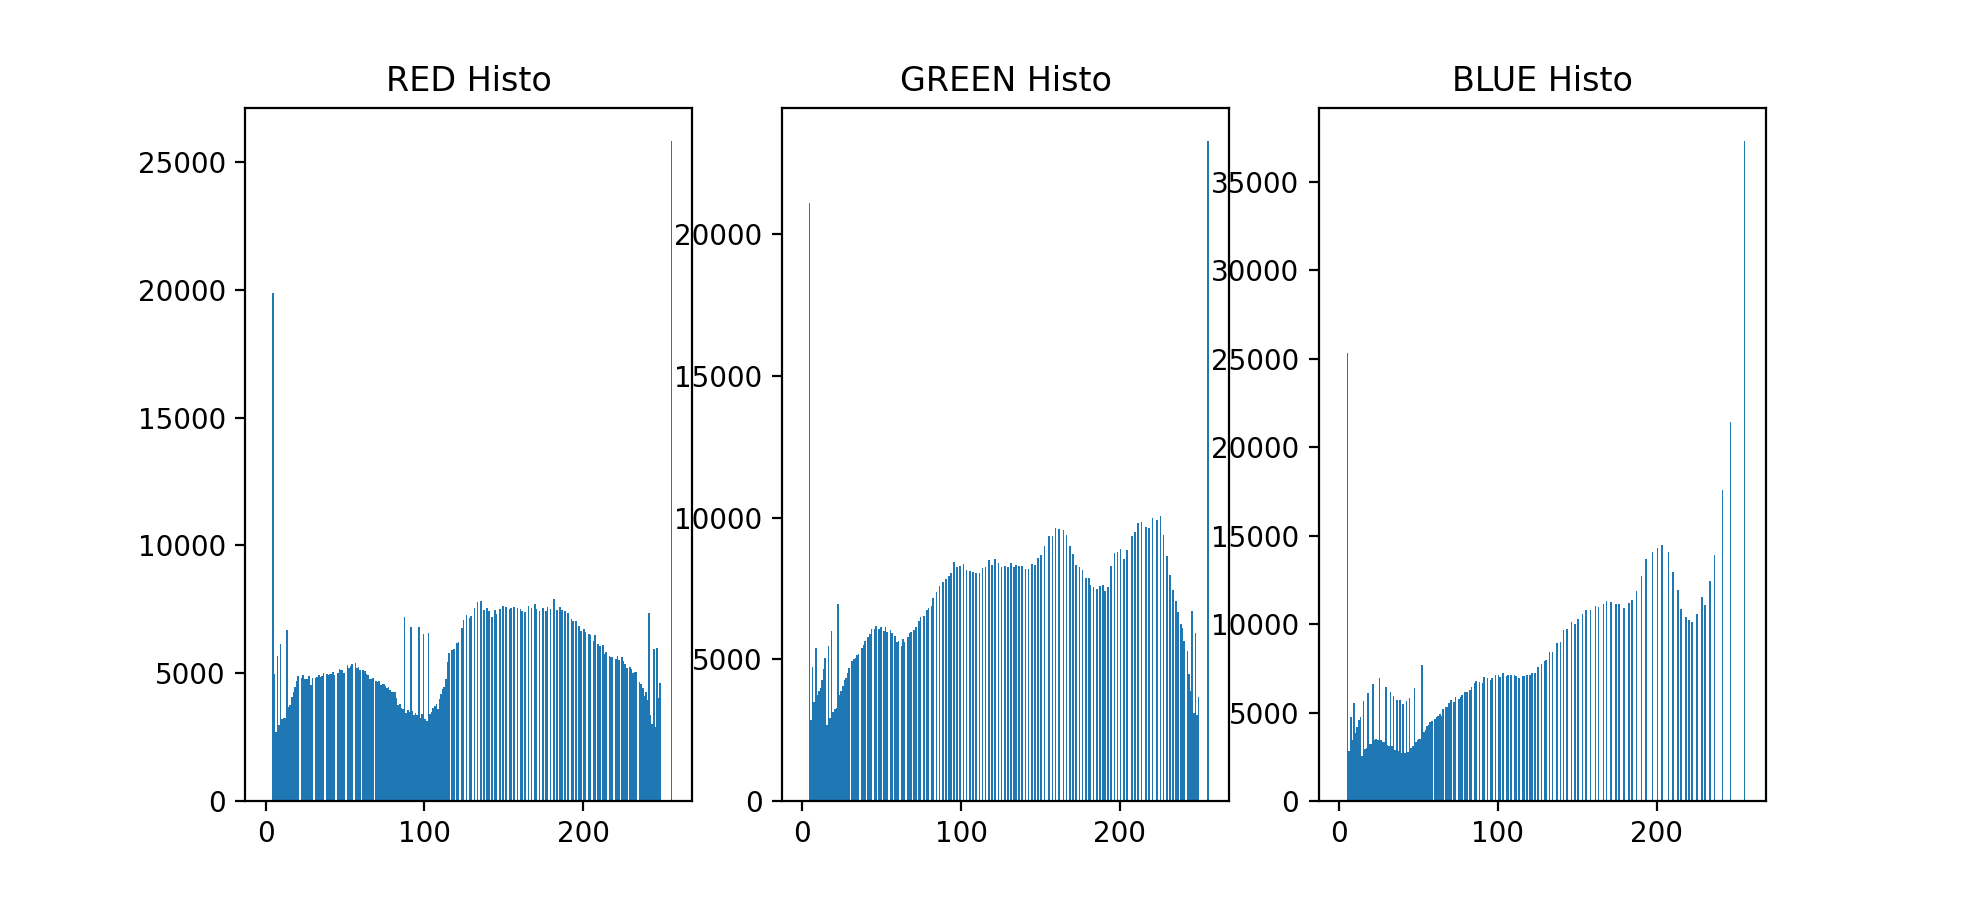

In [48]:
plt.figure()
plt.subplot(1,3,1)
plt.title('RED Histo')
plt.hist(im_out2[:,:,0].flatten(),bins=np.arange(257))
plt.subplot(1,3,2)
plt.title('GREEN Histo')
plt.hist(im_out2[:,:,1].flatten(),bins=np.arange(257))
plt.subplot(1,3,3)
plt.title('BLUE Histo')
plt.hist(im_out2[:,:,2].flatten(),bins=np.arange(257))
plt.show()

We can aslo apply some filters to reduce noises. In order to not blurred the image to much, the kernel chosen is a disk of ridus one. 

<IPython.core.display.Javascript object>


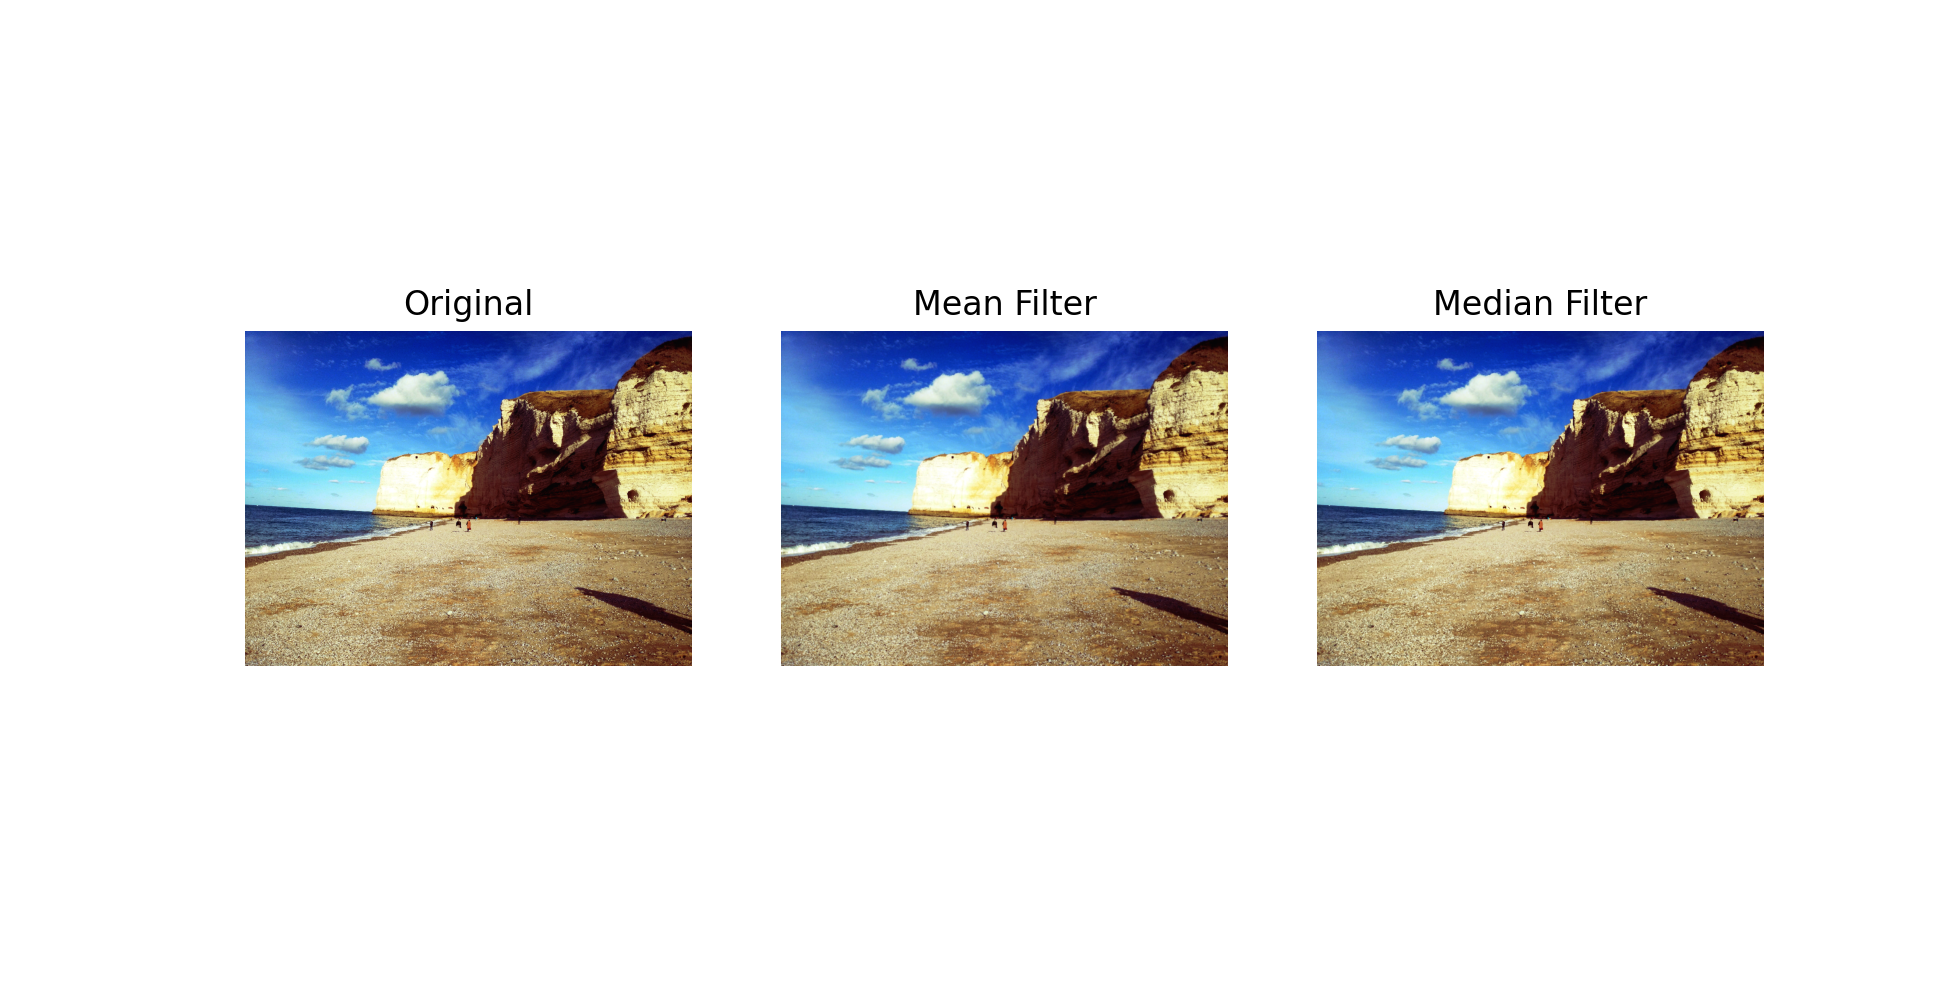

In [49]:
from skimage.filters.rank import median,mean
from skimage.morphology import disk
im_out3 = np.zeros((im.shape[0],im.shape[1],im.shape[2])).astype('uint8')
im_out4 = np.zeros((im.shape[0],im.shape[1],im.shape[2])).astype('uint8')

#mean filter
im_out3[:,:,0] = mean(im_out2[:,:,0],disk(1))
im_out3[:,:,1] = mean(im_out2[:,:,1],disk(1))
im_out3[:,:,2] = mean(im_out2[:,:,2],disk(1))

#median filter
im_out4[:,:,0] = median(im_out2[:,:,0],disk(1))
im_out4[:,:,1] = median(im_out2[:,:,1],disk(1))
im_out4[:,:,2] = median(im_out2[:,:,2],disk(1))

plt.figure() 
plt.subplot(1,3,1)
plt.axis('off')
plt.title("Original")
plt.imshow(im_out2)
plt.subplot(1,3,2)
plt.axis('off')
plt.title("Mean Filter")
plt.imshow(im_out3)
plt.subplot(1,3,3)
plt.axis('off')
plt.title("Median Filter")
plt.imshow(im_out4)
plt.show()